# Assignment 2: K-means clustering {-}

This assignment aims at familiarizing you with training and testing K-means clustering model. You will have to:

- Load the data.
- Analyze the data.
- Use Elbow method to determine the number of clusters K. Research the use of parameters of KElbowVisualizer function.
- Train a K-means clustering model.
- Perform cluster visualization in two ways:
  - Apply PCA to perform dimensionality reduction: project data features into a three-dimensional space and two-dimensional space and visualize the clusters.
  - Visualize the clusters using T-distributed Stochastic Neighbor Embedding (T-SNE). T-SNE is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. Refernece: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- Take some samples from each cluster and analyze their features to see the clusters' characteristics.


The dataset you will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, amount of purchase, etc., to develop a customer segmentation model.


## Import packages

In [ ]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/tnganduong/Data_Visualisation/main/credit-card-holder-data.csv", index_col=0)

In [ ]:
# Show data
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

In [ ]:
# My code goes here

In [ ]:
# Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# Drop null values if yes
df.dropna()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Show descriptive statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Exploratory Data Analysis

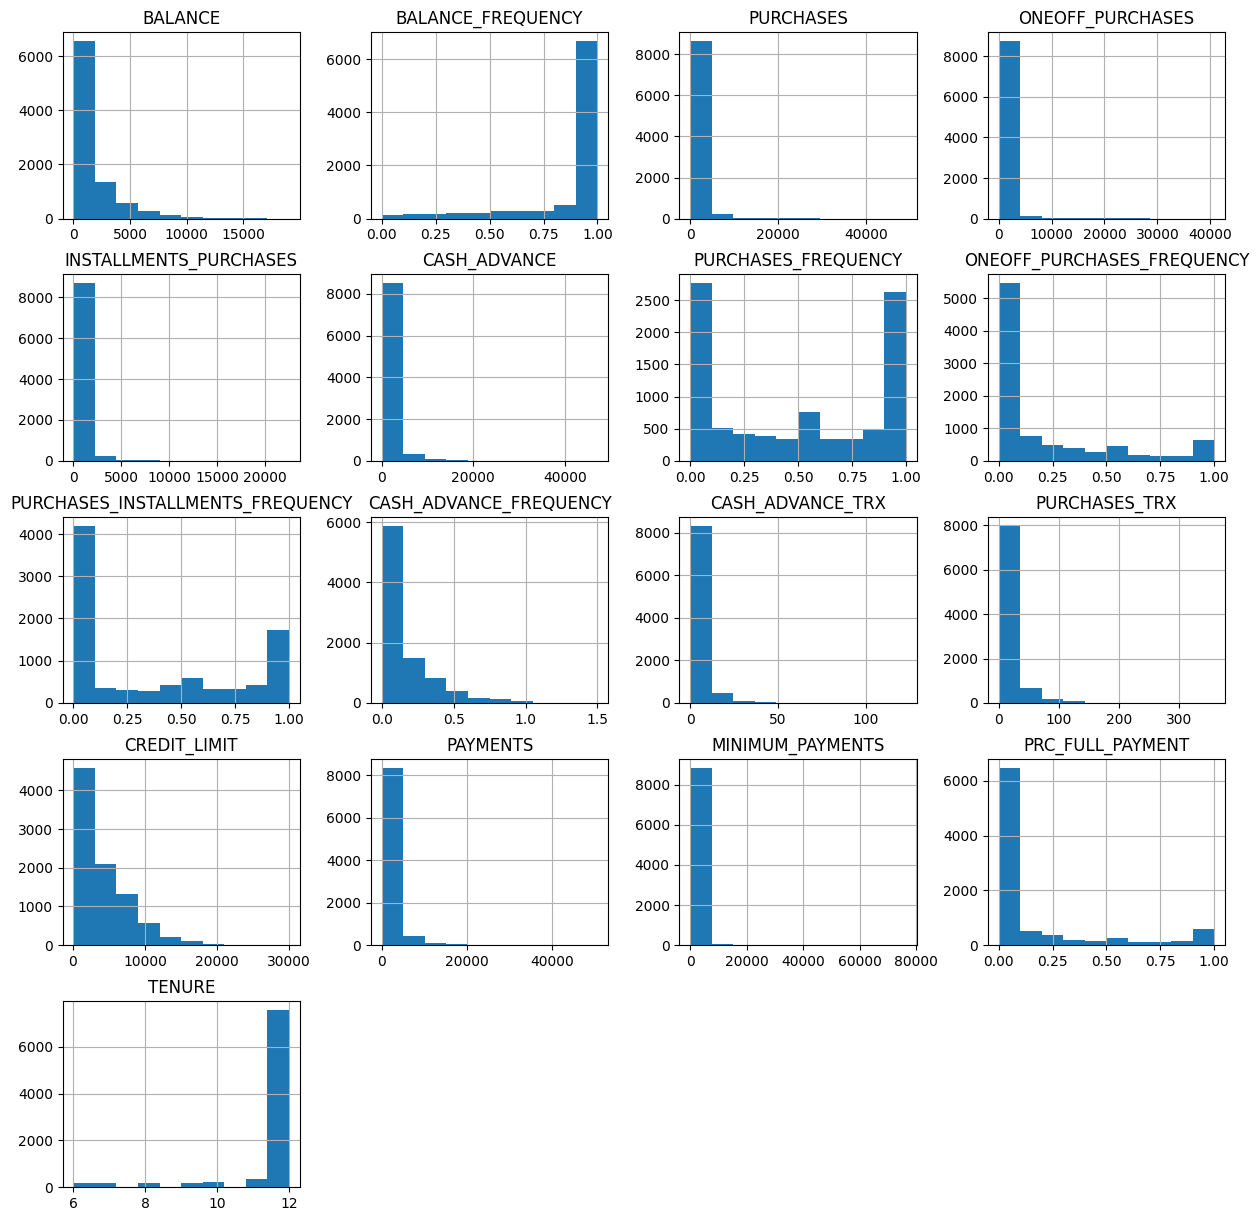

In [ ]:
# Plot histograms of all data features
df.hist(figsize=(15,15))
plt.show()

Some notes:
1. For `CREDIT_LIMIT`: The majority of customers do not have credit or have a low limit.
2. Most customers generally tend to hold the credit card up to 12 months.

<Axes: >

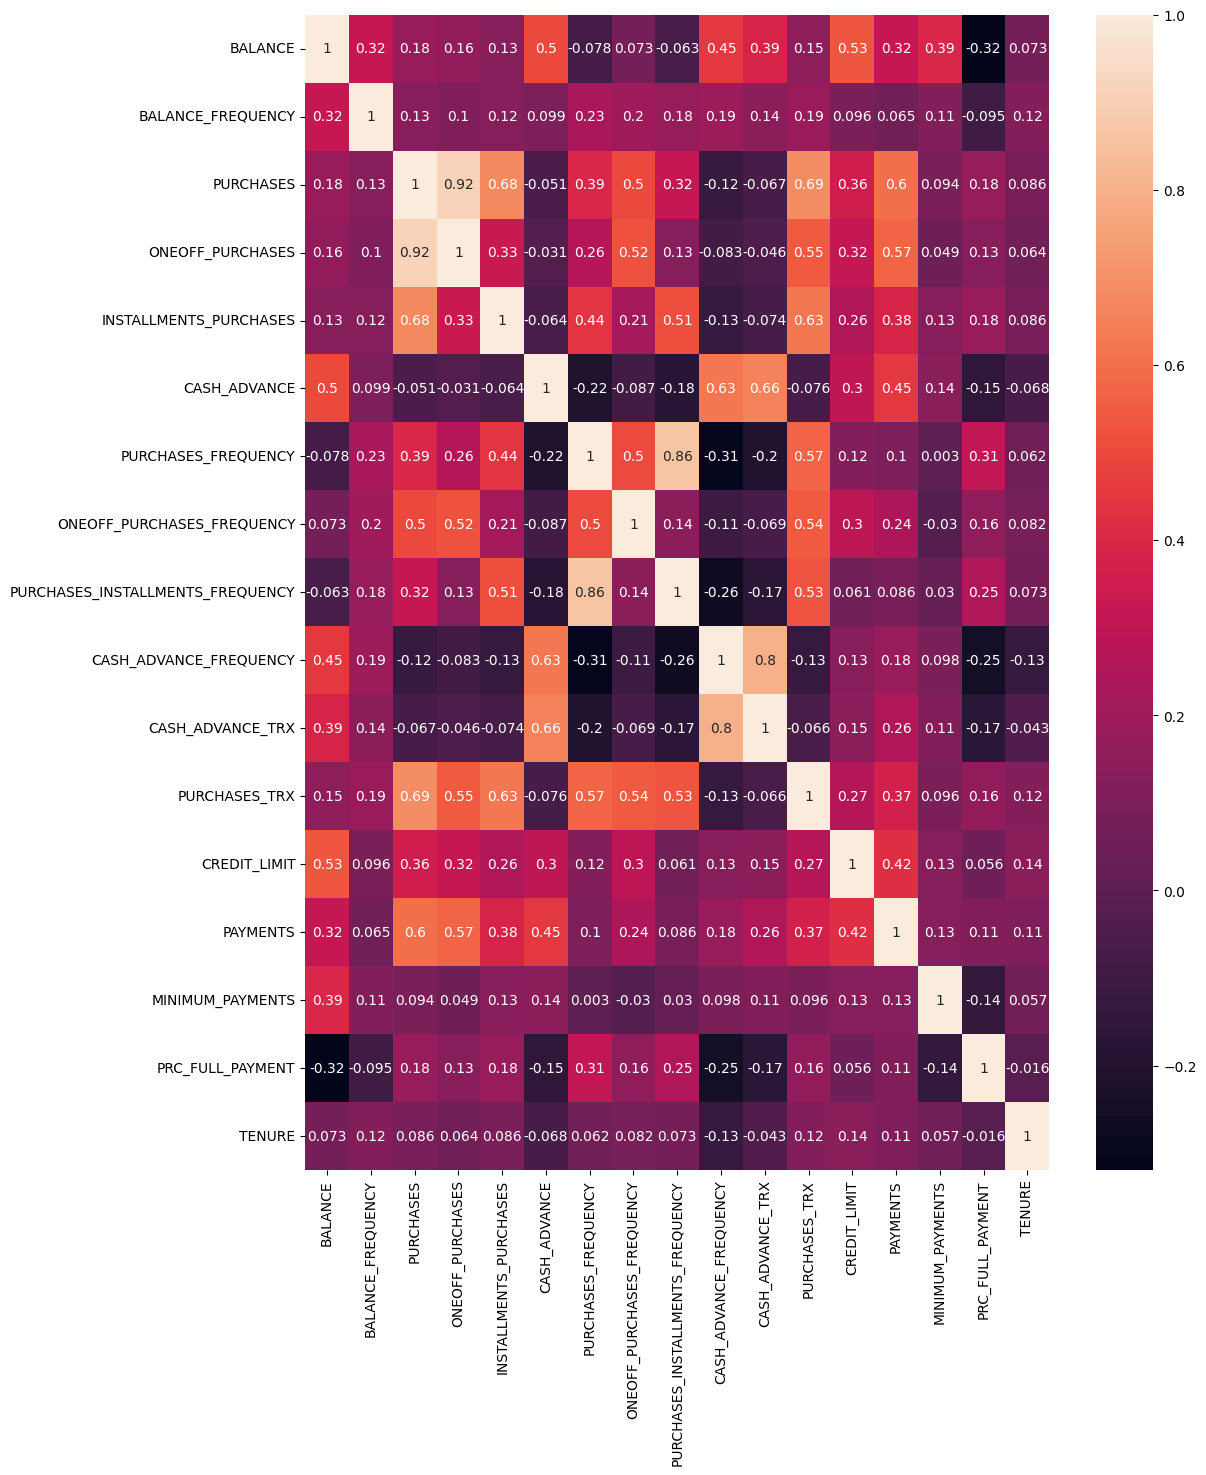

In [ ]:
# Plot heatmap to see any correlation
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(), annot=True)

Some notes:
- `PURCHASES` and `ONEOFF_PURCHASES` have a strong correlation.
- `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` have a strong correlation.
- `CASH_ADVANCE_FREQUENCY` AND `CASH_ADVANCE_TRX` have a strong correlation.

## Data Preprocessing
- Use Elbow method to determine the number of clusters K. Research the use of parameters of KElbowVisualizer function.
- Train a K-means clustering model.

In [ ]:
data = df.copy()

Since we don't have categorical features in data, we don't need to encode them anymore.

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
scaled_data = normalizer.fit_transform(data.values)

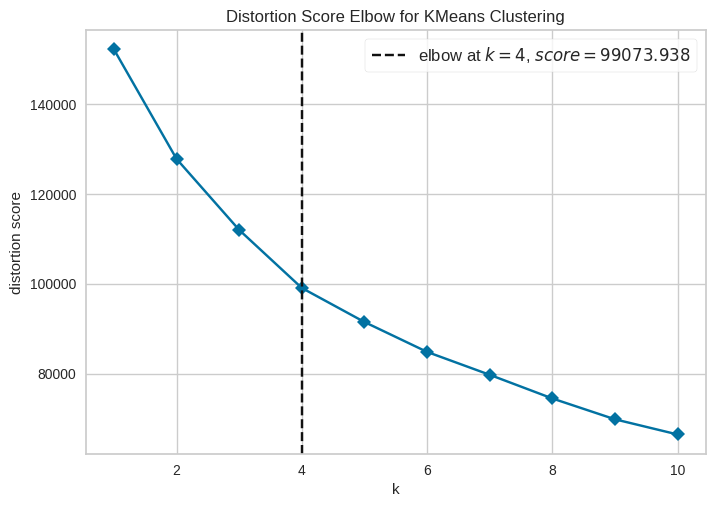

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Selecting k with the Elbow Method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False)
elbow_method.fit(scaled_data)
elbow_method.show()

In the elbow method, the optimal number of clusters is where the WCSS curve starts to flatten. This is because adding more clusters after this point does not significantly reduce the WCSS. That's why we choose 4 here as the number of clusters for this model.

In [ ]:
# Train a K-means model with 4 as the number of clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [ ]:
# Show cluster label of training data samples
kmeans.labels_

array([3, 0, 2, ..., 2, 3, 3], dtype=int32)

In [ ]:
# Make prediction on new data, but here we temporarily use the train set
y = kmeans.predict(scaled_data)
y

array([3, 0, 2, ..., 2, 3, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 1.45957775e+00,  3.84753065e-01, -2.34638427e-01,
        -1.63914013e-01, -2.53746975e-01,  1.68897201e+00,
        -5.04847568e-01, -2.12939102e-01, -4.50201244e-01,
         1.74594805e+00,  1.61714316e+00, -2.83579688e-01,
         8.38967661e-01,  6.03820830e-01,  4.90909814e-01,
        -4.06367280e-01, -9.71460234e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.24139633e-01],
       [-3.21688457e-01,  2.42573999e-01,  1.09043960e-01,
         9.26320814e-04,  2.55903798e-01, -3.66372614e-01,
         9.83720816e-01,  3.17152671e-01,  8.74137767e-01,
        -4.62598760e-01, -3.60303396e-01,  2.96985169e-01,
        -7.72980064e-02, -1.38501975e-01, -9.18443871e-02,
         3.95041454e-01,  5.7

In [ ]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}:")
    for feature, value in zip(df.columns, centroid):
        print(f"\t{feature}: {value}")

Cluster 1:
	BALANCE: 1.459577751847792
	BALANCE_FREQUENCY: 0.38475306509492907
	PURCHASES: -0.23463842650601863
	ONEOFF_PURCHASES: -0.16391401330101604
	INSTALLMENTS_PURCHASES: -0.253746974629877
	CASH_ADVANCE: 1.6889720070199503
	PURCHASES_FREQUENCY: -0.5048475683793724
	ONEOFF_PURCHASES_FREQUENCY: -0.2129391020424666
	PURCHASES_INSTALLMENTS_FREQUENCY: -0.45020124415328316
	CASH_ADVANCE_FREQUENCY: 1.745948051648992
	CASH_ADVANCE_TRX: 1.617143164200344
	PURCHASES_TRX: -0.2835796881479714
	CREDIT_LIMIT: 0.8389676611940184
	PAYMENTS: 0.6038208298226472
	MINIMUM_PAYMENTS: 0.4909098144973935
	PRC_FULL_PAYMENT: -0.40636728033756664
	TENURE: -0.09714602344901709
Cluster 2:
	BALANCE: 0.9544845072181525
	BALANCE_FREQUENCY: 0.46269362948707254
	PURCHASES: 3.1258446450629904
	ONEOFF_PURCHASES: 2.7132513094022452
	INSTALLMENTS_PURCHASES: 2.406469621413764
	CASH_ADVANCE: -0.15509059439663858
	PURCHASES_FREQUENCY: 1.1363375974590122
	ONEOFF_PURCHASES_FREQUENCY: 1.7986534893053012
	PURCHASES_INSTALL

## Cluster visualization
- Perform cluster visualization in two ways:
  - Apply PCA to perform dimensionality reduction: project data features into a three-dimensional space and two-dimensional space and visualize the clusters.
  - Visualize the clusters using T-distributed Stochastic Neighbor Embedding (T-SNE). T-SNE is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. Reference: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


### Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [ ]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


#### 3D Space PCA

In [ ]:
pca3 = PCA(n_components=3)
# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)
# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

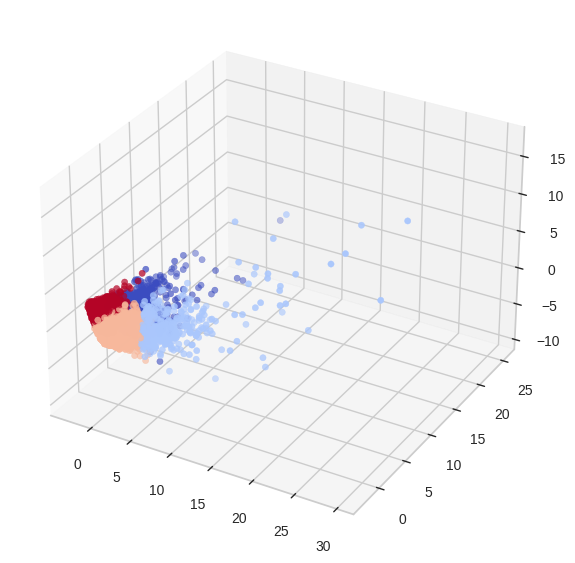

In [ ]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans.labels_, cmap="coolwarm")
plt.show()

#### 2D Space PCA

In [ ]:
pca2 = PCA(n_components=2)
pca2_data = pca2.fit_transform(scaled_data)
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

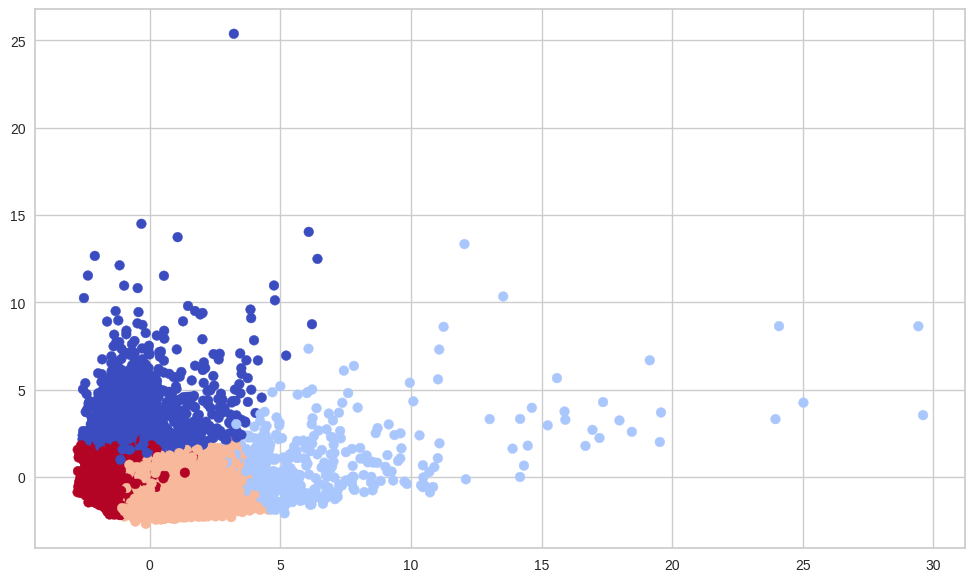

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans.labels_, cmap="coolwarm")
plt.show()

### T-distributed Stochastic Neighbor Embedding (T-SNE)

In [ ]:
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(scaled_data, method="ward")   # 'ward' method: combine clusters to minimize within-cluster-variation

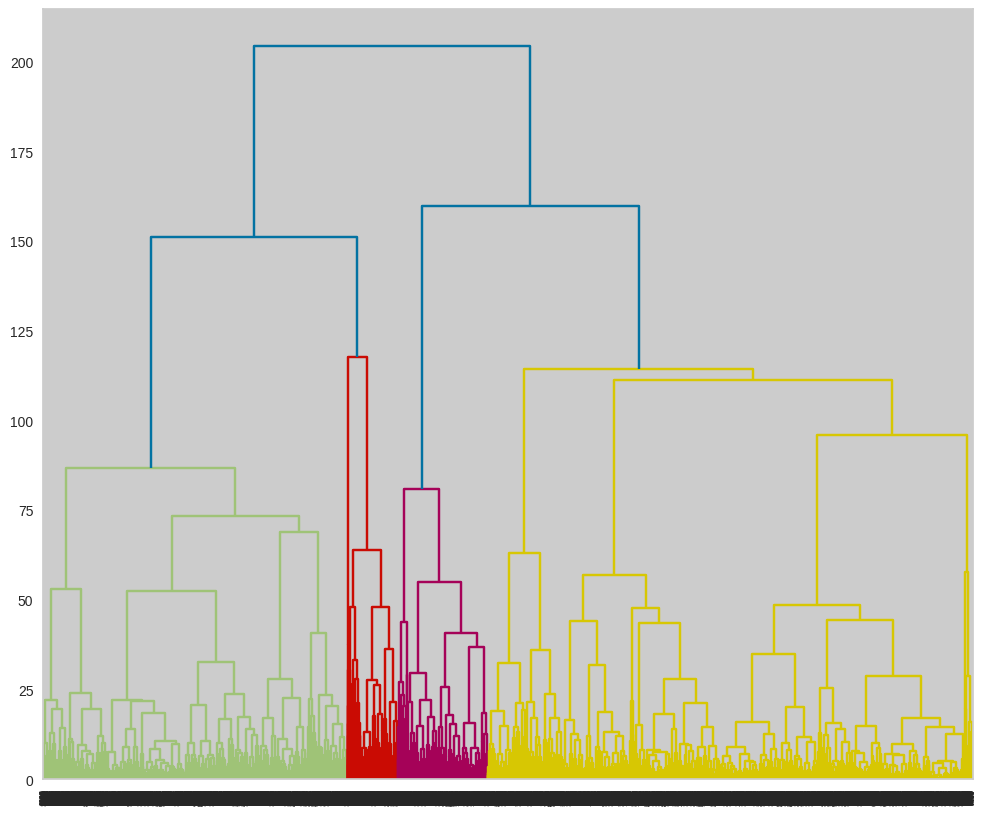

In [ ]:
# Plot the hierarchical clusters
plt.figure(figsize=(12, 10))
dendrogram = hierarchy.dendrogram(clusters)

In [ ]:
# Import AgglomerativeClustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Run the hierarchical clustering algorithm with
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(scaled_data)
clustering.labels_

array([1, 2, 3, ..., 1, 1, 1])

In [ ]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(scaled_data) # Project data (high dimension) to TSNE space (low dimension)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.002s...
[t-SNE] Computed neighbors for 8950 samples in 0.570s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.427264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.945908
[t-SNE] KL divergence after 1000 iterations: 1.500975


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

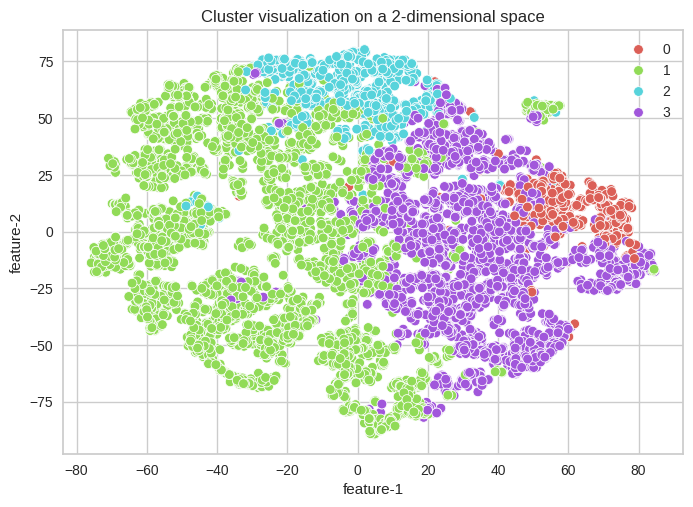

In [ ]:
# Create a data frame with TSNE features and data label
df = pd.DataFrame()
df["label"] = clustering.labels_
df["feature-1"] = tsne_features[:,0]
df["feature-2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature-1", y="feature-2", # Set the two TSNE features to the axes
                hue=df.label.tolist(), # Set the label
                palette=sns.color_palette("hls", 4), # Set cluster colors
                data=df).set(title="Cluster visualization on a 2-dimensional space") # Set dataframe to visulize and plot title

## Cluster Analysis
- Take some samples from each cluster and analyze their features to see the clusters' characteristics.

In [ ]:
import plotly.express as px

In [ ]:
# Extracting the data belongs to specific cluster.

dataModified = data.copy()
dataModified['cluster'] = kmeans.labels_

# Separate the data with respect to cluster
cluster0 = dataModified[dataModified['cluster'] == 0]
cluster1 = dataModified[dataModified['cluster'] == 1]
cluster2 = dataModified[dataModified['cluster'] == 2]
cluster3 = dataModified[dataModified['cluster'] == 3]

In [ ]:
clusters = pd.DataFrame(scaled_data, columns = data.columns)
clusters['label'] = kmeans.labels_

polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars = ["label"])

fig = px.line_polar(polar, r = "value", theta = "variable", color = "label", line_close = True, height = 700, width = 1000)
fig.show()

In this part, I will try to answer two questions:

1. What is the special characteristics of each cluster? How are these segments different from each other?
2. What are some recommendations to the bank on how to better market to and service these customers?

**Analysis:**

Based on the customers' spending pattern, there are four main customer segmentations:

- **Group 1 (active users) - (label 1)**: They have the highest amount of purchases and number of purchase transactions made, which means this is a highly potential group of customers. They also frequently use credit card for payments and other related things, so it's a noticeable trait that the bank need to consider also. As this group holds the highest credit limit (the total amount they can borrow), it implies that they will have a higher credit scores.


- For this type of customers, the bank should consider next ad compaign related to shopping, such as a special offer for those using their credit cards.


- **Group 2 (cash-prefer users) - (label 0)**: Contrast to Group 1, this group mainly use cash for their transactions or payments and they less likely to use card for purchasing any things. Maybe because they use cash advance more than credit card for payments, their balance is very high compared to other groups. Though having a relatively high credit limit, carrying high balances on credit cards could hint that they have more debt than they can handle.


- For this type of customers, the bank should consider lowering their cash advance fee and interest rate competitively.


- **Group 3 () - (label 2)**: This segmentation frequently make the purchases, escpecially purchases in installments and they tend to make a lot of full payments each time they used credit cards. However, the biggest difference is that their balance and credit limit is very low. The low credit limit means that they are not managing their available credit well. If they have been a responsible and active cardholder, the issuer may increase the limit. But a very low balance means they tend to keep their financial risks low.

- For this type of customer, the bank should tailor the program to encourage them to actively use credit cards as low credit limit could decrease their credit score.

- **Group 4 (least active users) - (label 3)**: This group is the least active among all. Since they do not use much credit card in their spendings, they risk the accounts being closed by the bank.
